<a href="https://www.kaggle.com/code/rebeccapringle/implementing-knn-from-scratch?scriptVersionId=117761757" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# KNN code from scratch and with SciKit Learn

K-nerarest neighbours is a supervised classifying technique that uses the distance of data points to group based on characteristics. When looking at a data point the label that is most prevelent arounf that point will be its classification. 

Steps for the algorithm:

1. Determine distance metrics for between data points
    - commonly euclidian distance is used here
2. Define the value of K and write a function to classify a data point
    - the value of K determines the number of nearest neighbours in a data cluster

## Load packages needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Data Sets
Quick overview of the data to be working with. Sample data from sklearn inspired by the article https://towardsdatascience.com/how-to-build-knn-from-scratch-in-python-5e22b8920bd2

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Split into X ansd Y data. Where X is the data to be trained and Y is the outcome classification of that data. 

Here this is removing the 'target' column and only including the 'target' column for X and Y respectively.

In [3]:
X = df.drop('target', axis = 1)
y = df.target

## Calculate the distance between two data points

In [4]:
def distance(point1, point2):
    squared_difference = 0
    for i in range(len(point1)):
        squared_difference += (point1[i] - point2[i]) ** 2
    final_distance = squared_difference ** 0.5
    return final_distance

Test the function

In [5]:
distance(X.iloc[0],X.iloc[1])

0.5385164807134502

## The main KNN alorithm

1. Get the distance between the test and all the data points
2. Order by closest to furthest
3. Use the closest points to classify that point

### Find the nearest data points to a test point

In [6]:
# Define an arbitrary test point
test_pt = [4.8, 2.7, 2.5, 0.7]

# Calculate distance between test_pt and all points in X
distances = []
for i in X.index:
    distances.append(distance(test_pt, X.iloc[i]))
df_dists = pd.DataFrame(data = distances, index = X.index, columns = ['distance'])

# Find the 5 nearest neighbors
df_nn = df_dists.sort_values(by=['distance'], axis = 0)[:5]
df_nn

,distance
98,0.734847
57,0.911043
93,0.964365
24,1.048809
23,1.063015


In [7]:
from collections import Counter

# Create counter object to track the labels
counter = Counter(y[df_nn.index])
# Get most common label of all the nearest neighbors
counter.most_common()[0][0]

1

Very simply this method needs to be repeated for all the data points 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data - 75% train, 25% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=1)

# Scale the X data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
def classify(test_point, X_train, y_train, k):
    distances = []
    #Looping through all points in the dataset
    for point in X_train:
        distance_to_point = distance(point, test_point)
        #Adding the distance and point associated with that distance
        distances.append(distance_to_point)
    # Store distances in a dataframe
    df_dists = pd.DataFrame(data = distances, columns = ['dist'], index = y_train.index)
        
    # Sort distances, and only consider the k closest points
    df_nn = df_dists.sort_values(by = ['dist'], axis = 0)[:k]
    # Create counter object to track the labels of k closest neighbors
    counter = Counter(y_train[df_nn.index])
    # Get most common label of all the nearest neighbors
    prediction = counter.most_common()[0][0]
    return prediction
  
# test the function
classify([5.2, 3.4, 2.4, 0.9],X_train, y_train, k = 5)

2

In [10]:
def knn_predict(X_test, X_train, y_train, k):
    y = []
    for test in X_test:
        prediction = classify(test, X_train, y_train, k)
        y.append(prediction)
        
    return y

knn_predict(X_test, X_train, y_train, k = 5)

[0,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 0]

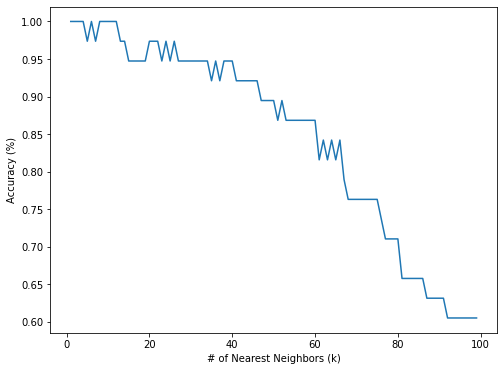

In [11]:
from sklearn.metrics import accuracy_score
accuracies = []

for k in range(1,100):
    y_hat_test = knn_predict(X_test, X_train,y_train, k)
    accuracies.append(accuracy_score(y_test, y_hat_test))

# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');